# Master Notebook

## Preface & Introduction

This notebook serves as a large repository of all of the coding necessary for the CS401 - ADA examination in the autumn 2024 semester. The major librairies that are used throughout the class will be summarised and the all programming aspects of course content will be reviewed here.
This Jupyter notebook goes hand in hand with the associated theoretical course summary that is also present on this repository. 

## Table of Contents
 - [Pandas](#pandas)
 - [Data Visualisation: Matplotlib and Seaborn](#Data-Visualisation:-Matplotlib-and-Seaborn)
 - [Basic Statistical Analysis](#Basic-Statistical-Analysis)
 - [Regression Analysis](#Regression-Analysis)
 - [Causal Analysis](#Causal-Analysis)
 - [Machine Learning](#Machine-Learning)
 - [Text Data](#Text-Data)
 - [Network Data: Networkx](#Network-Data:-Networkx)
 - [Massive Data](#Massive-Data)

Before starting, the major librairies must be imported. Some of the librairies like statsmodel and scikit have weird imports so these will just be added as we go on before being generalised.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels as sm
import math as math

## Pandas

Pandas is the main library that will be used in this class as it permits very efficient handling of dataframes which are the crux of data analysis.
All of the commands given in the introduction to pandas tutorial will be included on top of any other examples that may appear when reviewing laboratory sessions, homeworks or the exams.

The first task is to import the data. The data will usually be in the form of a csv delimited by commas.

In [3]:
df=pd.read_csv('../Homework/02_PROJECT_CAR_SALES/data/Task1-2.ToyotaCorolla-clean.csv', 
               sep=',', skiprows=[2], na_values=['?'], index_col=[]) 
## na_values indicates what values must be considered by the dataframe as null
## index_col indicates what columns should be taken as index, overrides the initial index
## skiprows was given as an example, the brackets make it so that line 2 and not the first two lines are skipped
df.head(10) #Always a good idea to head in order to quickly visualise the data at hand

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
2,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
3,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
4,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
5,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF
6,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245,CHF
7,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF
8,11187.0,23,71138.0,Diesel,69,0,0,1900,3,1105,CHF
9,18097.0,25,31461.0,Petrol,192,0,0,1800,3,1185,CHF


The data can also appear in other formats such as json files.

In [4]:
dfjson=pd.read_json('./jsonfiletest.jsonl', lines=True)
#dfjson.head(10)
## The dot specifies that we take it from the current directory. .. would signify a "backspace"

### Basic Pandas Functions

Basic operations on the data frames include the following:
 - Copying the dataframe (always a good idea when you don't really know what you are doing)
 - Getting the dataframe's size
 - Renaming, adding or removing columns
 - Locating certain columns
 - Checking for unique values or counting occurences
 - Filtering the dataframe

Copying a dataframe and getting its size are quite simple operations.

In [5]:
## Copying a dataframe
df_deepcopy = df.copy()

## Getting the dataframe's size
print(df.shape[0]) ## Returns the number of rows
print(df.shape[1]) ## returns the number of columns

1435
11


Renaming columns is quite simple.

In [6]:
df.rename(columns={'HP': 'Horsepower'}, inplace=True) ## inplace specifies that the modification is performed on the dataframe
df.head(0)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency


So is adding them.

In [7]:
df['Toyota'] = 'Yes'
df.head(3)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency,Toyota
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO,Yes
1,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF,Yes
2,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF,Yes


Removing functions is mainly done through the drop functions.

In [8]:
df.drop(1, axis=0, inplace=True) ## Row with index 1 is dropped
df.drop('Toyota', axis=1, inplace=True) ## Previously addeed toyota column is removed
df.head(5)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
2,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
3,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
4,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
5,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF


Locating something in a dataframe can be done with the .loc and .iloc functions. They are quite similar with the exception that .loc works with row/column labels and .iloc with the indices.

In [9]:
df.iloc[4, 2] 
## returns entry [4,2] (pandas starts enumerating at 0). The value given is the mileage of car  with index 5

94612.0

In [10]:
df.loc[(df["Age"]==28) & (df['FuelType'] == 'Petrol')]
## simply locates all cars that are 28 years old and run on petrol

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
14,19005.0,28,18739.0,Petrol,192,0,0,1800,3,1185,CHF
21,15950.0,28,56349.0,Petrol,110,1,0,1600,3,1120,EURO
22,16950.0,28,32220.0,Petrol,110,1,0,1600,3,1120,EURO
27,14642.0,28,44142.0,Petrol,110,0,0,1600,3,1120,CHF
55,13173.0,28,43210.0,Petrol,97,0,0,1400,5,1110,CHF
65,16370.0,28,30993.0,Petrol,110,1,0,1600,5,1130,CHF
69,13778.0,28,29206.0,Petrol,97,1,0,1400,5,1110,CHF
71,16370.0,28,28817.0,Petrol,110,1,0,1598,5,1130,CHF
73,17233.0,28,28000.0,Petrol,110,0,0,1600,5,1130,CHF
84,15074.0,28,8537.0,Petrol,110,1,0,1600,5,1130,CHF


In [11]:
df.loc[(df["Age"]==28) | (df['FuelType'] == 'Petrol')]
## locates all cars that are 28 years old OR run on petrol

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
7,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF
9,18097.0,25,31461.0,Petrol,192,0,0,1800,3,1185,CHF
10,17233.0,22,43610.0,Petrol,192,0,0,1800,3,1185,CHF
11,16931.0,25,32189.0,Petrol,192,0,0,1800,3,1185,CHF
12,18572.0,31,23000.0,Petrol,192,1,0,1800,3,1185,CHF
...,...,...,...,...,...,...,...,...,...,...,...
1430,6479.0,69,20544.0,Petrol,86,1,0,1300,3,1025,CHF
1431,9369.0,72,19000.0,Petrol,86,0,0,1300,3,1015,CHF
1432,7343.0,71,17016.0,Petrol,86,0,0,1300,3,1015,CHF
1433,6263.0,70,16916.0,Petrol,86,1,0,1300,3,1015,CHF


Checking for unique values can be very useful when handling data.

In [12]:
print(df['Age'].unique())  # Get unique car ages

print(df['Age'].nunique())  # Returns the number of unique age values

print(df['Horsepower'].value_counts(dropna=True))  # Frequency of unique values in the horsepower column
# dropna can be set to false, in this case null values will be treated as any other value

df.drop_duplicates()  # Drops duplicate rows

is_value_present = 3 in df['Age'].unique() ## checks if 3 is one of the unique age values

## It is also possible to return the frequency of the unique values of a column as new dataframe
freq_df = df['Age'].value_counts().reset_index()
freq_df.columns = ['Value', 'Frequency']
freq_df.head(10)

[23 26 30 32 27 25 22 31 28 24 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]
77
Horsepower
110    835
86     249
97     164
72      73
90      34
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64


,Value,Frequency
0,68,69
1,65,63
2,80,59
3,78,47
4,62,42
5,67,38
6,61,37
7,54,37
8,77,37
9,75,35


Filtering the dataframe is another very basic yet powerful tool. 

In [13]:
df2=df[(df['Age']==20) | (df['Price']>15000.0)]
## returns a new dataframe with the cars with an age of 20 or the cars with a price greater than 15k
df2.head(10)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
6,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245,CHF
7,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF
9,18097.0,25,31461.0,Petrol,192,0,0,1800,3,1185,CHF
10,17233.0,22,43610.0,Petrol,192,0,0,1800,3,1185,CHF
11,16931.0,25,32189.0,Petrol,192,0,0,1800,3,1185,CHF
12,18572.0,31,23000.0,Petrol,192,1,0,1800,3,1185,CHF
13,19436.0,32,34131.0,Petrol,192,1,0,1800,3,1185,CHF
14,19005.0,28,18739.0,Petrol,192,0,0,1800,3,1185,CHF
15,19652.0,30,34000.0,Petrol,192,1,0,1800,3,1185,CHF
16,15506.0,24,21716.0,Petrol,110,1,0,1600,3,1105,CHF


### Avanced Topics in Pandas

More advanced topics in pandas include:
 - Handling null values
 - Index manipulation
 - Merging/Concatenating two dataframes
 - Iterating over rows
 - Grouping functions
 - Applying lambda functions
 - Creating hierarchical indexes
 - In place data modification


Most datasets are incomplete. Some of the missing values will apear as Na or NAN. Such data will ususally have to be cleaned before meaningful analysis can be performed.

In [14]:
df.isnull() ## Identification of null values (false means they are not)
df.isnull().sum() ## counts the null values per column, adding another .sum() returns the total number of null values

df.columns[df.isnull().any()] ## Identifies columns with a null value
df[df.isnull().any(axis=1)] ## // rows

dfna1 = df.dropna(axis=0, inplace=False) ## Will drop any rows with some sort of a null value, axis=1 => drops columns

## Alternative is to replace the null value with the mean of the column
dfna2 = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['int64', 'float64'] else col, axis=0)
## lambda functions will be explained later on in this notebook
## else col preserved the columns if they are not a numeric value
df['Age'] = df['Age'].fillna(df['Age'].mean()) ## does the same but applies it to a specified column

dfna3 = df.fillna(0) ## All nan values are replaced by a 0


Manipulating indexes can also be useful.

In [15]:
#df.set_index('Age')  # Sets column 'Age' as index (did not run it but this is how you would do it)
df.reset_index(inplace=True)  # Reset index to default
df.drop('index', axis=1, inplace=True)
#df.drop('level_0', axis=1, inplace=True) ##no idea why it did that 
df.head(5)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
2,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
3,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
4,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF


In [16]:
df3=df
carunique = df.Age + df.Horsepower
df3.index = carunique
## New indexes can be determined like this as well

df3.head(5)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
113,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
116,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
120,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
122,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
117,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF


In [17]:
df_hierarchical = df.set_index(['Age', 'Price'])
df_hierarchical.head(5)
## Hierarchical indexes can also be created

,,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
Age,Price,,,,,,,,,
23,13500.0,46986.0,Diesel,90,1,0,2000,3,1165,EURO
26,12914.0,48000.0,Diesel,90,0,0,2000,3,1165,CHF
30,11878.0,38500.0,Diesel,90,0,0,2000,3,1170,CHF
32,11187.0,61000.0,Diesel,90,0,0,2000,3,1170,CHF
27,14599.0,94612.0,Diesel,90,1,0,2000,3,1245,CHF


In [18]:
df_hierarchical.loc[(23, 13500.0)]

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\1400049623.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_hierarchical.loc[(23, 13500.0)]


,,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
Age,Price,,,,,,,,,
23,13500.0,46986.0,Diesel,90,1,0,2000,3,1165,EURO


Combining two different dataframes is done using the .concat or the .merge funcions. While similar they have some key differences.
Visual examples can be found in the pandas documentation.

Merging combines two dataframes based on a common key (column or index). It integrates datasets by aligning rows with matching values or retaining rows based on specified conditions. There are four main types of merges: inner, which includes only rows with matching keys in both DataFrames; outer, which includes all rows from both DataFrames, filling unmatched values with NaN; left, which retains all rows from the left DataFrame and includes matching rows from the right; and right, which retains all rows from the right DataFrame and includes matching rows from the left. 

Concatenation in Pandas is the process of combining DataFrames or Series along a particular axis, either stacking rows (axis=0, default) or adding columns (axis=1). Unlike merging, concatenation does not require a common key and simply appends data, aligning by index unless instructed otherwise. Concatenation is useful when combining datasets with similar structures, such as adding rows from multiple sources or appending new features (columns) to an existing DataFrame. You can choose to ignore existing indices with ignore_index=True or align them explicitly to match specific requirements. It is a straightforward and efficient method for combining data with minimal structural complexity.

In [19]:
# Merge by column
df_merged = pd.merge(df, df2, on='Age', how='inner')
df_merged.head(10)

,Price_x,Age,Mileage_x,FuelType_x,Horsepower_x,MetColor_x,Automatic_x,CC_x,Doors_x,Weight_x,...,Price_y,Mileage_y,FuelType_y,Horsepower_y,MetColor_y,Automatic_y,CC_y,Doors_y,Weight_y,Currency_y
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,...,16413.0,84000.0,Diesel,90,0,0,2000,5,1270,CHF
1,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,...,16370.0,39704.0,Petrol,110,1,1,1600,5,1180,CHF
2,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,...,17709.0,56000.0,Petrol,110,1,1,1600,5,1180,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,...,16950.0,32181.0,Petrol,110,1,0,1600,5,1075,EURO
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,...,16068.0,75889.0,Diesel,90,1,0,2000,3,1245,CHF
5,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,...,19652.0,34000.0,Petrol,192,1,0,1800,3,1185,CHF
6,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,...,15506.0,11090.0,Petrol,110,1,0,1600,3,1120,CHF
7,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,...,15506.0,33511.0,Petrol,110,1,0,1600,5,1130,CHF
8,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,...,19436.0,34131.0,Petrol,192,1,0,1800,3,1185,CHF
9,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,...,18572.0,19700.0,Petrol,192,0,0,1800,3,1185,CHF


In [20]:
# Concatenate along rows
df_concat = pd.concat([df, df2], axis=0)
df_concat

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency
113,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
116,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
120,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
122,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
117,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF
...,...,...,...,...,...,...,...,...,...,...,...
181,18249.0,2,225.0,Petrol,97,1,0,1400,5,1110,CHF
182,18572.0,2,15.0,Petrol,110,1,0,1600,5,1130,CHF
183,17795.0,1,1.0,Petrol,98,1,0,1400,4,1100,EURO
184,15761.0,1,1.0,Petrol,110,1,0,1600,5,1075,CHF


Iterating over rows in pandas is not done traditionally but instead uses the .iterrows() function.

In [21]:
for index, row in df.iterrows():
    if row['Age']>25:
        df.loc[index, 'Old'] = 'Yes'
    else:
        df.loc[index, 'Old'] = 'No'

    df.loc[index, 'Age in 5 Years'] = row['Age'] + 5 ## important to use row['Age'] and not df['Age]

df.head(10)
## beugue un peu mais bon

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency,Old,Age in 5 Years
113,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO,Yes,49.0
116,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF,Yes,52.0
120,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF,Yes,56.0
122,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF,Yes,58.0
117,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF,Yes,53.0
120,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245,CHF,Yes,56.0
219,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF,Yes,32.0
92,11187.0,23,71138.0,Diesel,69,0,0,1900,3,1105,CHF,No,28.0
217,18097.0,25,31461.0,Petrol,192,0,0,1800,3,1185,CHF,No,30.0
214,17233.0,22,43610.0,Petrol,192,0,0,1800,3,1185,CHF,No,27.0


Grouping functions are a very powerful tool in python. They allow the splitting, applycation and combination dataframes.

In [22]:
df.groupby('Age')['Horsepower'].sum()
## This functions returns the sum of the horsepowers of all cars of a certain age. 

Age
1      208
2      207
4      348
6      110
7      543
      ... 
76    3014
77    3692
78    4693
79    3088
80    6066
Name: Horsepower, Length: 77, dtype: int64

All groupby operations have the format above: groupby("something").somefunctions()

In [23]:
df.groupby('Age')['Horsepower'].agg(['sum', 'mean', 'count'])
## aggregate lets you perform the sum, mean and count operations at once

,sum,mean,count
Age,,,
1,208,104.000000,2
2,207,103.500000,2
4,348,116.000000,3
6,110,110.000000,1
7,543,108.600000,5
...,...,...,...
76,3014,100.466667,30
77,3692,99.783784,37
78,4693,99.851064,47


In [24]:
df.groupby('Horsepower').filter(lambda x: x['Age'].sum() > 10000)
## Groups all of the cars by horsepower and filters them by the sum of their combined ages

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency,Old,Age in 5 Years
134,15506.0,24,21716.0,Petrol,110,1,0,1600,3,1105,CHF,Yes,67.0
134,16750.0,24,25563.0,Petrol,110,0,0,1600,3,1065,EURO,Yes,67.0
140,14642.0,30,64359.0,Petrol,110,1,0,1600,3,1105,CHF,Yes,73.0
140,13778.0,30,67660.0,Petrol,110,1,0,1600,3,1105,CHF,Yes,73.0
139,14642.0,29,43905.0,Petrol,110,0,1,1600,3,1170,CHF,Yes,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,6479.0,69,20544.0,Petrol,86,1,0,1300,3,1025,CHF,Yes,74.0
158,9369.0,72,19000.0,Petrol,86,0,0,1300,3,1015,CHF,Yes,77.0
157,7343.0,71,17016.0,Petrol,86,0,0,1300,3,1015,CHF,Yes,76.0
156,6263.0,70,16916.0,Petrol,86,1,0,1300,3,1015,CHF,Yes,75.0


Standard lambda functions can also be applied

In [25]:
df.groupby('Horsepower')['Age'].apply(lambda x: x.max() - x.min())

Horsepower
69     33
71      0
72     29
73      0
86     39
90     72
97     54
98      8
107    20
110    79
116    58
192    13
Name: Age, dtype: int64

Lambda functions are another very powerful tool in pandas. They allow quick and easy operations to be performed without the need to define a whole functions with tools like .iterrows().
They are frequently used with either .apply or .filter. The difference in the two lies in the fact that .apply modifies the data in place which is not the case for filter. It is also important to note that the latter may only be used with a groupby object.

In [26]:
df.drop('Age in 5 Years',axis=1, inplace=True) ## to show it can be done more easily

In [27]:
df['AgeIn5'] = df['Age'].apply(lambda x: x + 5)
df.head(10)

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,CC,Doors,Weight,Currency,Old,AgeIn5
113,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO,Yes,28
116,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF,Yes,31
120,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF,Yes,35
122,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF,Yes,37
117,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF,Yes,32
120,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245,CHF,Yes,35
219,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF,Yes,32
92,11187.0,23,71138.0,Diesel,69,0,0,1900,3,1105,CHF,No,28
217,18097.0,25,31461.0,Petrol,192,0,0,1800,3,1185,CHF,No,30
214,17233.0,22,43610.0,Petrol,192,0,0,1800,3,1185,CHF,No,27


The data of the dataframe itself can also be cleaned during wrangling. 

In [28]:
df=pd.read_csv('../Homework/02_PROJECT_CAR_SALES/data/Task1-2.ToyotaCorolla-raw.csv', sep=',', skiprows=[32])

df.iloc[905]

Price        8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF
Age                                                       NaN
Mileage                                                   NaN
FuelType                                                  NaN
HP                                                        NaN
MetColor                                                  NaN
Automatic                                                 NaN
CC                                                        NaN
Doors                                                     NaN
Weight                                                    NaN
Currency                                                  NaN
Name: 905, dtype: object

In [29]:
split_values = df.loc[905, 'Price'].split(";") ## Row is turned into a dataframe
split_values1 = [s.replace("'","").strip() for s in split_values] ## remove whitespace from every line, not mandatory
split_values2 = [pd.to_numeric(s, errors='ignore') for s in split_values]#plit_values 1 could have been used
df.loc[905, df.columns] = split_values2
df.iloc[905]

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\2233347117.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  split_values2 = [pd.to_numeric(s, errors='ignore') for s in split_values]#plit_values 1 could have been used


Price         8423.0
Age             68.0
Mileage      58860.0
FuelType      Petrol
HP             110.0
MetColor         1.0
Automatic        0.0
CC            1600.0
Doors            3.0
Weight        1055.0
Currency         CHF
Name: 905, dtype: object

## Data Visualisation: Matplotlib and Seaborn

Matplotlib and seaborn are the two main libraires that are used for plotting here. They seem to be able to be used interchangeably but the course does have a preference for matplotlib so more focus will be put on it.
Additional information may be found on their respective documentations.
The main forms of graphs will be discussed here individually depending on which librairy is more appropriate:
 - Scatter plots
 - Line plots
 - Box plots
 - Histograms

Additional elements important to visualisation such as logarithmic plots, plot panels, error bars, trend lines and so on will also be put on here. The dataframe from laboratory session 2 will be reused.

In [30]:
df=pd.read_csv('../Exercises/02 - Data viz and data from the web/Data/blockbusters.csv', sep=',')
df.head(10)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


In [31]:
## code to turn the worldwide gross into ints.

df['worldwide_gross']=df['worldwide_gross'].apply(lambda x: int(float(x.replace("$", "").replace(",", ""))))
## conversion into floats before integers was necessry due to the trailing whitespace

### Basic data visualisation

Scatter plots are a powerful tool when it comes to the visualisation of data. The code to get them is quite basic. 

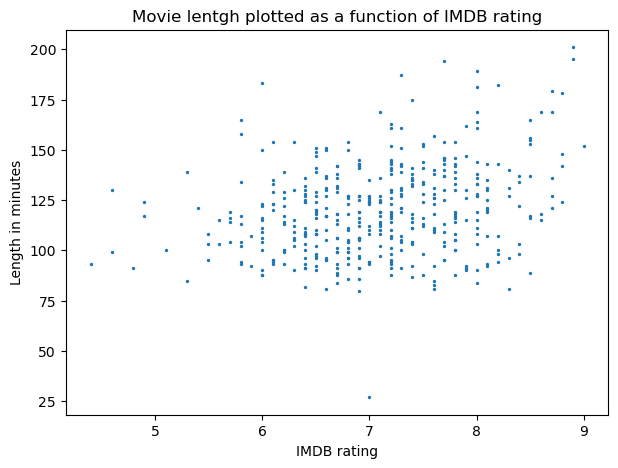

In [32]:
fig, ax = plt.subplots(figsize=(7, 5)) ## determines the figure size delimited by the axes
## Not mandatory but a good practice, 9,7 is better but it is here smaller for the sake of the notebook

ax.scatter(df['imdb_rating'], df['length'], s=2)
## s=2 changes the size of the individual dots, more such parameters can be found in matplotlib documentation
ax.set_xlabel("IMDB rating")
ax.set_ylabel("Length in minutes")
ax.set_title("Movie lentgh plotted as a function of IMDB rating"); # to suppress the output

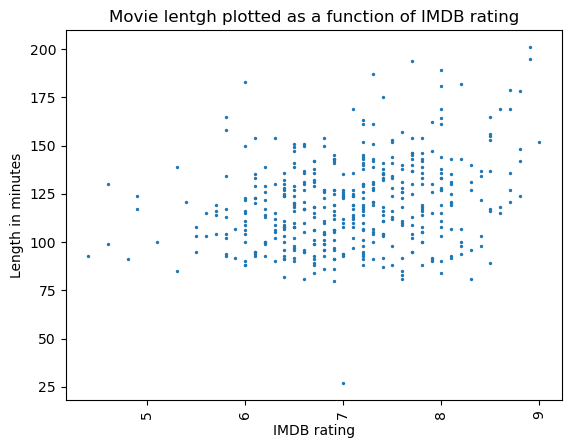

In [33]:
## alternative equivalent code

plt.scatter(df['imdb_rating'], df['length'], s=2)
## s=2 changes the size of the individual dots, more such parameters can be found in matplotlib documentation
plt.xlabel("IMDB rating")
plt.ylabel("Length in minutes")
plt.title("Movie lentgh plotted as a function of IMDB rating") # to suppress the output
plt.xticks(rotation = 90);

The two snippets of code above used matplotlib. Using seaborn is also possible.

Text(0, 0.5, 'Length')

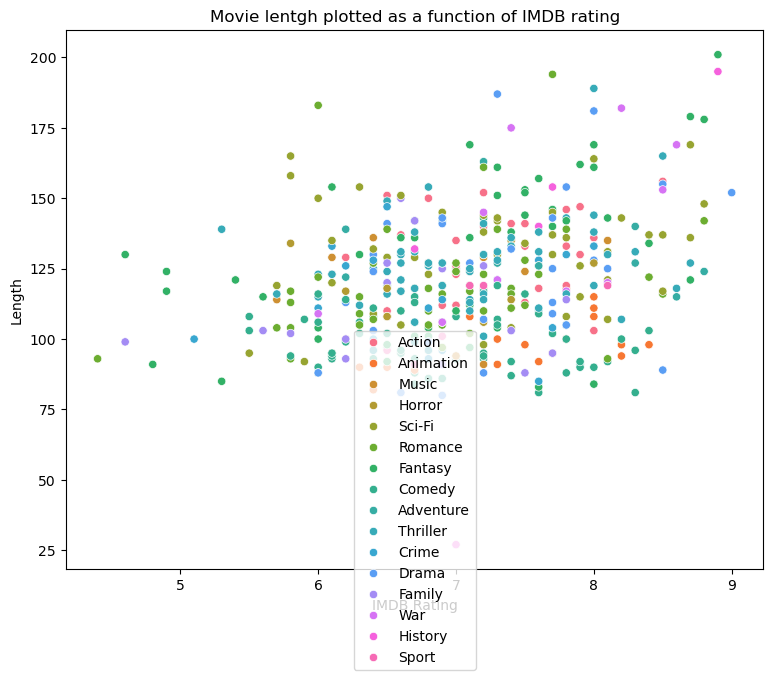

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.scatterplot(df, x='imdb_rating', y='length', hue='Main_Genre') ## automatically creates differentiation depending on the main genre
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2)) ## plays with the position of the legend
ax.set_title("Movie lentgh plotted as a function of IMDB rating")
ax.set_xlabel("IMDB Rating")
ax.set_ylabel("Length")

## gigantic legend so a bit ugly here mais bon

Scatter plots may not be particularly adpapted to very large datasets. Seaborn joint plots offer good alternatives in this case.

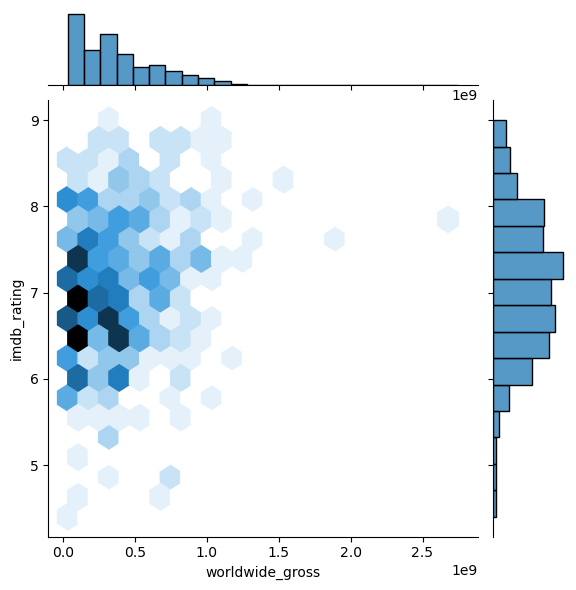

In [35]:
sns.jointplot(x=df['worldwide_gross'], y=df['imdb_rating'], kind="hex")

Barplots/histograms are another example of common types of plots.

Text(0.5, 1.0, 'Movie Length distribution')

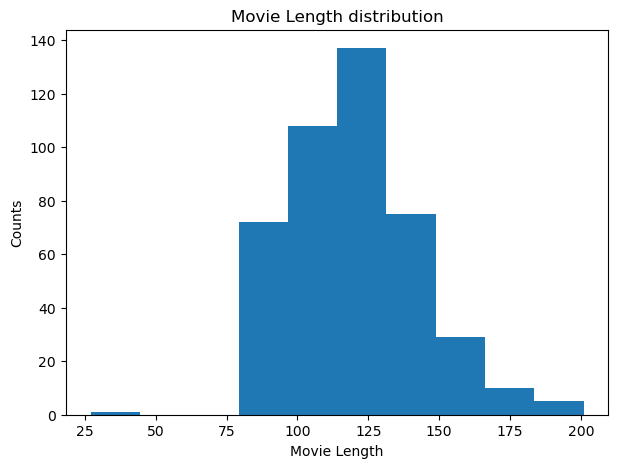

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(df['length'])
ax.set_xlabel("Movie Length")
ax.set_ylabel("Counts")
ax.set_title("Movie Length distribution")

Text(0.5, 1.0, 'Worldwide gross revenue distribution')

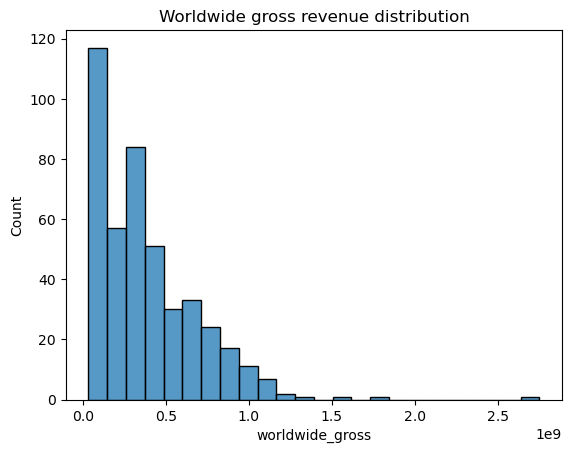

In [37]:
## seaborn alternative
ax = sns.histplot(df, x='worldwide_gross')
ax.set_title("Worldwide gross revenue distribution")

Barplots are plotted similarly. 
The code template below can be generalised to other types of plots (such as boxplots or violin plots per example).

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\2663134521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

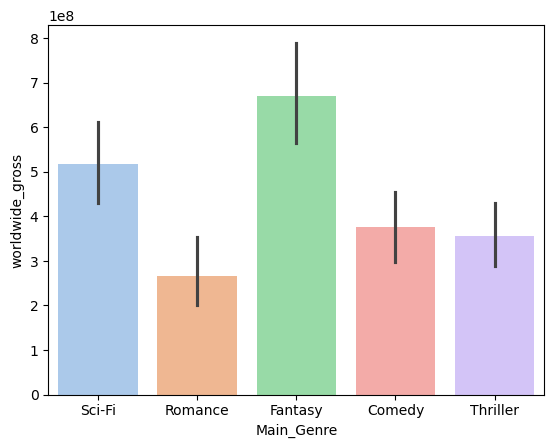

In [38]:
sns.barplot(
    x="Main_Genre",
    y="worldwide_gross",
    data=df.loc[df['Main_Genre'].isin(['Thriller', 'Comedy', 'Fantasy', 'Sci-Fi', 'Romance'])],
    palette="pastel",  ## specifies the colour## specifies the error bars
)

Multiple histograms can be represented on a single figure in a similar manner. 

<Axes: xlabel='length', ylabel='Count'>

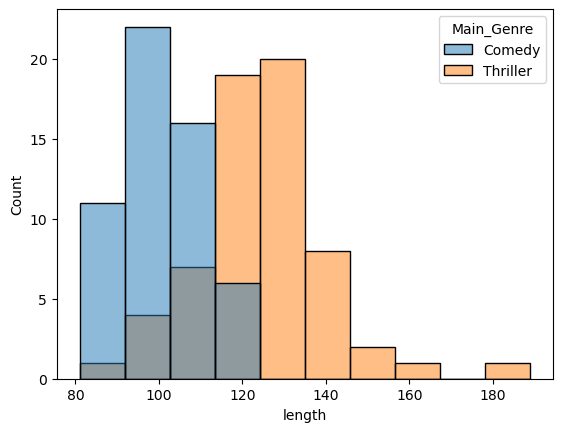

In [39]:
sns.histplot(
    x='length',
    data=df.loc[df['Main_Genre'].isin(['Thriller', 'Comedy'])],
    hue='Main_Genre'
)

### Advanced Data Visualisation

There exist some more advanced data visualisation techniques including but not limited to:
 - Error, trendlines and uncertainty modelling
 - Plot panels
 - Visualisation of skewed distributions

Error and uncertainty can be modelled in many different ways including but not limited to:
 - Error bars
 - Confidence intervals
 - Shaded regions

Confidence intervals are the most easily represented out of the three above. The 'ci' parameter simply has to be indicated when declaring a plot.

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\1579908486.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_year = df.groupby(df['year']).apply(lambda x: pd.Series({


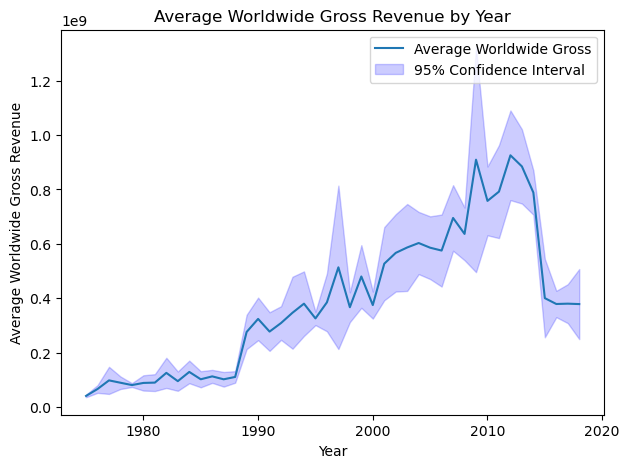

In [40]:
stats_by_year = df.groupby(df['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))
stats_by_year.reset_index(inplace = True)

stats_by_year['sample_size'] = df.groupby('year')['worldwide_gross'].count().values

# Calculate the margin of error for 95% CI
z = 1.96  # Z-score for a 95% confidence level
stats_by_year['margin_of_error'] = z * (stats_by_year['std_dev_worldwide_gross'] / np.sqrt(stats_by_year['sample_size']))

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(stats_by_year['year'], stats_by_year['average_worldwide_gross'], label='Average Worldwide Gross')
ax.fill_between(stats_by_year['year'], 
                stats_by_year['average_worldwide_gross'] - stats_by_year['margin_of_error'],
                stats_by_year['average_worldwide_gross'] + stats_by_year['margin_of_error'],
                color="blue", alpha=0.2, label="95% Confidence Interval")
ax.set_xlabel('Year')
ax.set_ylabel('Average Worldwide Gross Revenue')
ax.set_title('Average Worldwide Gross Revenue by Year')
ax.legend()

plt.show()

Long and annoying! Not the case in Seaborn

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\4288580960.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(df, x='year', y='worldwide_gross', ci=95)


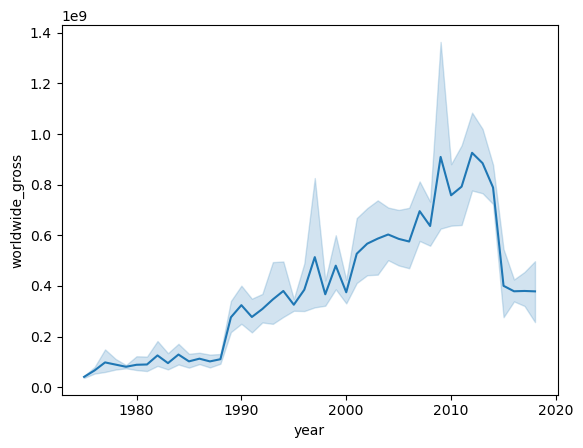

In [41]:
ax = sns.lineplot(df, x='year', y='worldwide_gross', ci=95)

Error bars can be used as an alternative in matplotlib.

Text(0, 0.5, 'Worldwide gross revenue')

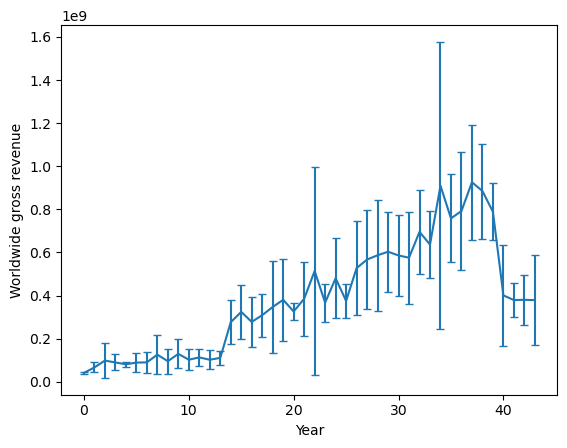

In [42]:
plt.errorbar(stats_by_year.index, stats_by_year.average_worldwide_gross,
             yerr = stats_by_year.std_dev_worldwide_gross,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

Rememebr that disgusting scatter plot with the huge legend? There exists an alternative: creating one plot per category and displaying them all in a plot pannel!

In [43]:
stats_by_category = df.groupby(df['Main_Genre']).apply(lambda x: pd.Series({
        'length': x['length'].values
    }))

stats_by_category.reset_index(inplace=True)
stats_by_category.head(5)

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_11108\971271510.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_category = df.groupby(df['Main_Genre']).apply(lambda x: pd.Series({


,Main_Genre,length
0,Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
1,Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
2,Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
3,Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
4,Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."


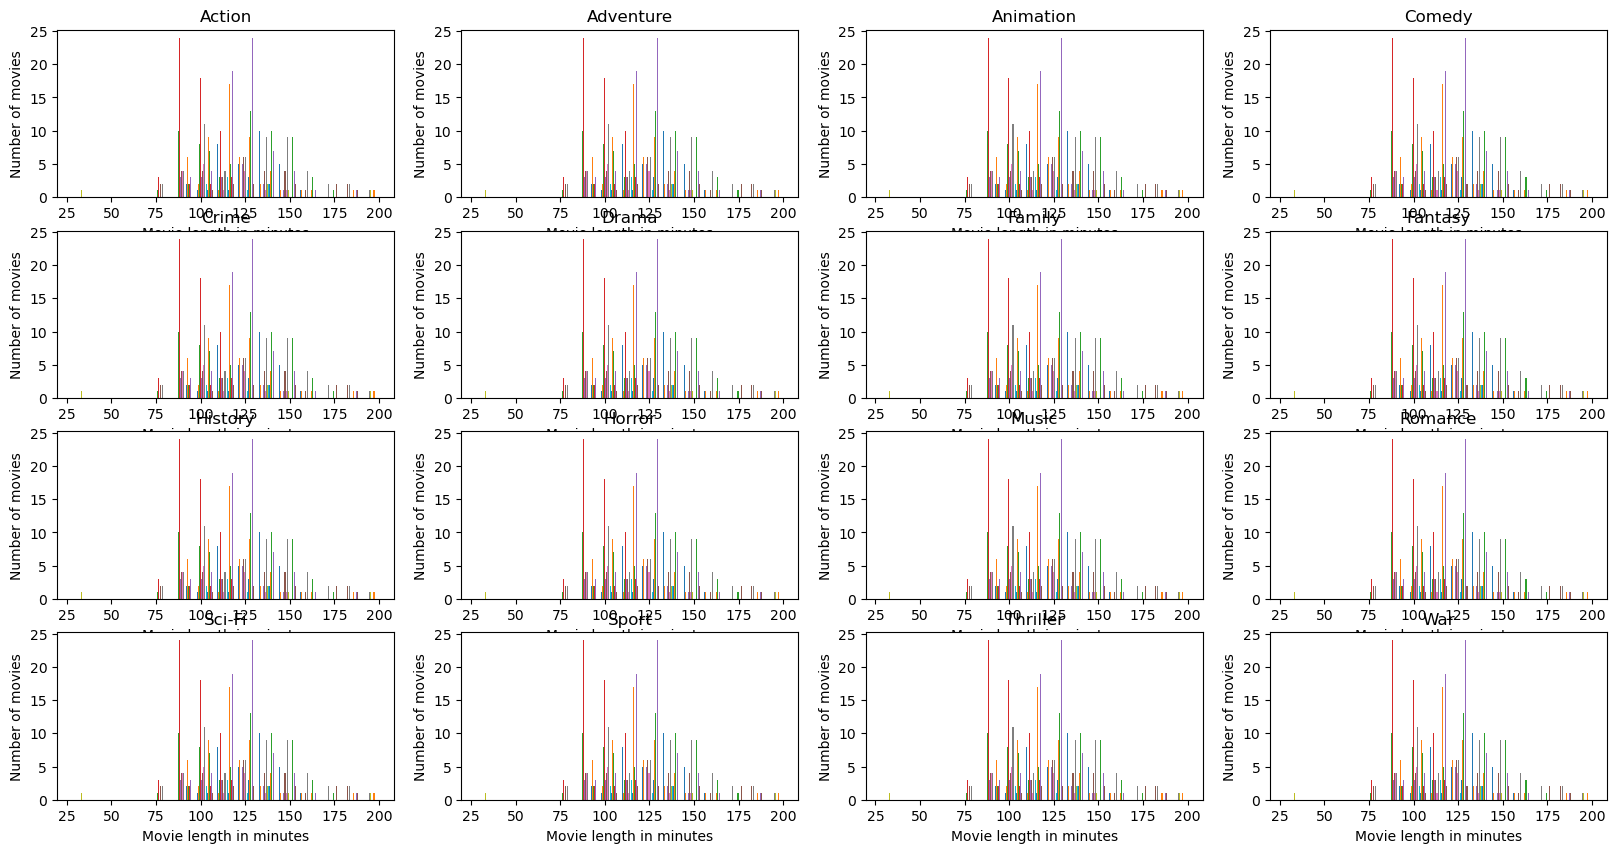

In [44]:
plt.figure(figsize=(20, 10))

for i in range(stats_by_category.shape[0]) : ## loops over every index
    plt.subplot(4,4,i+1) ## defines 
    plt.hist(stats_by_category['length'].values, bins=15)
    plt.xlabel('Movie length in minutes')
    plt.ylabel('Number of movies')
    plt.title(stats_by_category.Main_Genre[i])

In some cases, the data follows a skewed distribution, making its visualtisation challenging. 
The importation of the data was weird for some reason as I could not read .xls files even after having modified the file.
The way to set log plots is given at the end of the data vizard exercise solution on the main ADA2024 repo (mine is corrupted for some reason).

Finally, while regression analysis is described in more detail at the given section, a very basic one can be drawn up using seaborn's lmplot feature.

c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


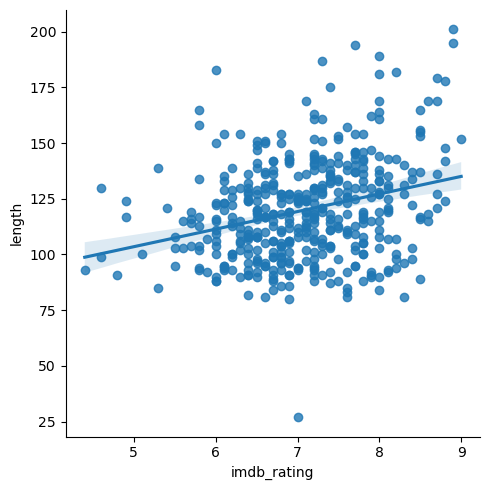

In [45]:
ax = sns.lmplot(df, x='imdb_rating', y='length')

## Basic Statistical Analyses

In this comparatively small section, the basic ways through which statistical analyses (going beyond just using the built in pandas .mean() functions and so on) are described.
The primary library here will be the SciPy library but stasmodel and some built in pandas functions will also be shown.

In [46]:
from statsmodels.stats import diagnostic
from scipy import stats

In [47]:
df = pd.read_csv('../Exercises/03 - Describing Data/data/acs2015_county_data.csv')
df.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


The income per capita will be the first focus. The basic statistics can be given as such.

In [48]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

Statsmodel's diagnostic function can help with hypotheses regarding the distribution of the income per capita.

In [49]:
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

A KS Test is performed. The first number is the KS Test statistic (apparently it indicates that there is some deviation between the normal distribution and the income distribution). The second value is the pvalue which is much smaller than 0.05. The null hypothesis that the income follows a normal distribution may thus be rejected.

How do unemployment and income correlate? SciPy offers a large number of different correlation measurements. In this case, Spearman correlation is more appropriate than Pearson correlation as a monotonic relationship is more likely than a strictly linear one. 

In [50]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

The statistic being greater than 1 shows that there is a slight, yet significant as shown by the pvalue, positive correlation between employment and income per capita.

Finally, hypothesis testing could answer questions such as is the income per capita in Maryland counties greater than that of Texan counties.

In [51]:
df.loc[df['State'] == 'Maryland']['IncomePerCap'].mean()

33073.208333333336

In [52]:
df.loc[df['State'] == 'Massachusetts']['IncomePerCap'].mean()

35554.42857142857

In [53]:
stats.ttest_ind(df.loc[df['State'] == 'Maryland']['IncomePerCap'], df.loc[df['State'] == 'Massachusetts']['IncomePerCap'])

TtestResult(statistic=-1.0085609256548833, pvalue=0.3199164079588116, df=36.0)

The independence test's value is much greater than 0.05, indicating that the difference in income between Massachusetts and Maryland is significant.

## Regression Analysis

Here the basic methods through which regressions (linear and logistic mostly) are performed are described.
The statsmodel library is the main library through which linear regressions are performed.

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('../Exercises/04 - Regression Analysis/data/heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The following is rehashed from lab session 4. The initial goal is to model time spent at the hospital.

In [55]:
mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)
## The model is declared using ordinary least squares (ols). 
## time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)
## This is the formula that will be used. time is what is sought to be predicted. The C() indicates that a 
## categorical variable is used and the * indicates that the two variables interact.

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           4.32e-22
Time:                        19:17:51   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

The purpose of specifying Treatment(reference=0) in C(DEATH_EVENT, Treatment(reference=0)) is to explicitly set a reference category for the categorical variable DEATH_EVENT. This reference category serves as the baseline against which the effects of other categories are compared. The coefficient for the baseline category (DEATH_EVENT=0) is not included in the model, because it is absorbed into the intercept.


The results of the linear regression are interpreted as follows:
 - R-squared => Explains 30.3% of the variance in the dependent variable (time) that is explained by the    predictors in the model. A relatively low value suggests the predictors explain only a modest amount of variation in time.
 - Adj. R-squared: 0.293 => Adjusted for the number of predictors, making it more reliable for comparing models with different numbers of predictors. Slightly lower than R-squared due to penalty for including multiple predictors.
 - F-statistic: 31.92 => (p-value: 4.32e-22) => Tests whether the overall model (all predictors together) significantly explains the variance in time.The p-value (4.32e-22) is extremely small, indicating the model is statistically significant overall.
 - Intercept: 164.83 The predicted value of time when all categorical predictors are in their reference categories (high_blood_pressure=0, DEATH_EVENT=0, diabetes=0).
 - C(high_blood_pressure)[T.1]: -26.15 => Having high blood pressure (high_blood_pressure=1) reduces time by 26.15 units on average, compared to those without high blood pressure (high_blood_pressure=0)Statistically significant (p=0.008, < 0.05).
 - C(DEATH_EVENT, Treatment(reference=0))[T.1]: -86.45 => Individuals with DEATH_EVENT=1 have a time that is 86.45 units lower, on average, compared to those with DEATH_EVENT=0. Highly significant (p<0.001).
 - C(diabetes)[T.1]: 4.79 => Individuals with diabetes (diabetes=1) have a time that is 4.79 units higher, but this effect is not statistically significant (p=0.532).
 - Interaction: C(high_blood_pressure)[T.1]:C(DEATH_EVENT)[T.1]: 2.78 => The interaction term suggests the combined effect of having high blood pressure and a death event on time is an additional 2.78 units. However, this is not significant (p=0.868).

Death is modelled as a binary event: 1 means dead and 0 means not dead. As such, a logistic regression would be required to model it.

In [56]:
df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean())/df['creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean())/df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean())/df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean())/df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean())/df['serum_sodium'].std()

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                  0.2160
Time:                        19:17:51   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

Note that the initial parameters must be standardised as they include values on different orders of magnitude.

The results can be made prettier.

In [57]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.872683,-0.453819
C(diabetes)[T.1],-0.431428,0.734243
C(high_blood_pressure)[T.1],-0.180976,1.018851
C(sex)[T.1],-1.086628,0.288599
C(anaemia)[T.1],-0.171894,1.007753
C(smoking)[T.1],-0.547629,0.818807
age,0.356256,0.968609
creatinine_phosphokinase,0.010320,0.553497
ejection_fraction,-1.177018,-0.487482
platelets,-0.379319,0.240561


0 and 1 represent confidence intervals. If 0 is included, then the parameter is probably not very significant.

In [58]:
print("T'as vu que fumer est bon pour la santé!")

T'as vu que fumer est bon pour la santé!


## Causal Analysis

This section focuses on causal analysis, rehashing the contents of laboratory session 5.

Note: that notebook has some very nice graphs if you want to take a look at them at some point.

In [59]:
df = pd.read_csv('../Exercises/05 - Causal analysis of observational data/data/lalonde.csv')
df.head(5)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


We seek to compute the propensity scores of this dataset to see how likely someoe is to receive treatment.

In [60]:
df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['educ'] = (df['educ'] - df['educ'].mean())/df['educ'].std()
df['re74'] = (df['re74'] - df['re74'].mean())/df['re74'].std()
df['re75'] = (df['re75'] - df['re75'].mean())/df['re75'].std()

mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + \
        +re74 + re75', data=df)

res = mod.fit()

# Extract the estimated propensity scores
df['Propensity_score'] = res.predict()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                  0.3508
Time:                        19:17:51   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

Once the propensity scores have been computed, matching must be performed. The similarity thus has to be computed. 

In [63]:
def get_similarity(propensity_score1, propensity_score2):
    return 1-np.abs(propensity_score1-propensity_score2)

# Separate the treatment and control groups
treatment_df = df[df['treat'] == 1]
control_df = df[df['treat'] == 0]

G = nx.Graph() ## see networkx summary for more information

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])
        # Add an edge between the two instances weighted by the similarity between them
            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

balanced_df_1 = df.iloc[matched] ## new dataframe with the matched individuals is created
balanced_df_1.head(5)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,Propensity_score
14,NSW15,1,-1.048780,-1.243655,1,0,0,1,-0.703546,-0.662971,3023.879,0.608586
19,NSW20,1,-0.137958,0.658697,1,0,0,0,-0.703546,-0.662971,10747.350,0.664320
155,NSW156,1,-0.239161,1.039168,1,0,0,0,1.204913,0.274843,0.000,0.526464
341,PSID157,0,-1.048780,-1.243655,1,0,0,1,-0.540827,0.030738,1613.677,0.619613
1,NSW2,1,-0.542768,-0.482714,0,1,0,1,-0.703546,-0.662971,3595.894,0.224634


It would have been better to only add edges if the individual have the same race (it would have also been quicker, see observational studies lab solutions). 

The before last question of homework 2 demonstrates how to perform propensity score matching without using netwrokx but it is quite a bit longer and I currently may not be fucked to put it in here.

## Machine Learning

Machine learning is primarily run through the Scikit library. The major machine learning models will all be individually demonstrated here. These are:
 - [Linear Regression](#Linear-Regression)
 - [Logistic Regression](#Logistic-Regression)
 - [Random Forests](#Random-Forests)
 - [k-NN](#k-NN)
 - [Decision Trees](#Decision-Trees)
 - [K-means](#K-means)
 - [DBSCAN](#DBSCAN)

In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, auc, roc_curve
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

### Linear Regression

The linear regression training included here is rehashed from that given in the supervised learning lab.

In [65]:
data = pd.read_csv('../Exercises/06 - Learning from data - Supervised Learning/data/Advertising.csv', index_col=0)
data.head()

## I should really define a shortcut j'en ai marre de réécrire toute cette merde à chaque fois.

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The goal of the ML here is to predict sales from ad exepense through a linear regression model. The ML will learn the optimal coefficients 

In [66]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


0.04576464545539761 * TV + 
0.18853001691820462 * radio + 
-0.0010374930424763159 * newspaper + 
2.9388893694594067
3.0728633085299126


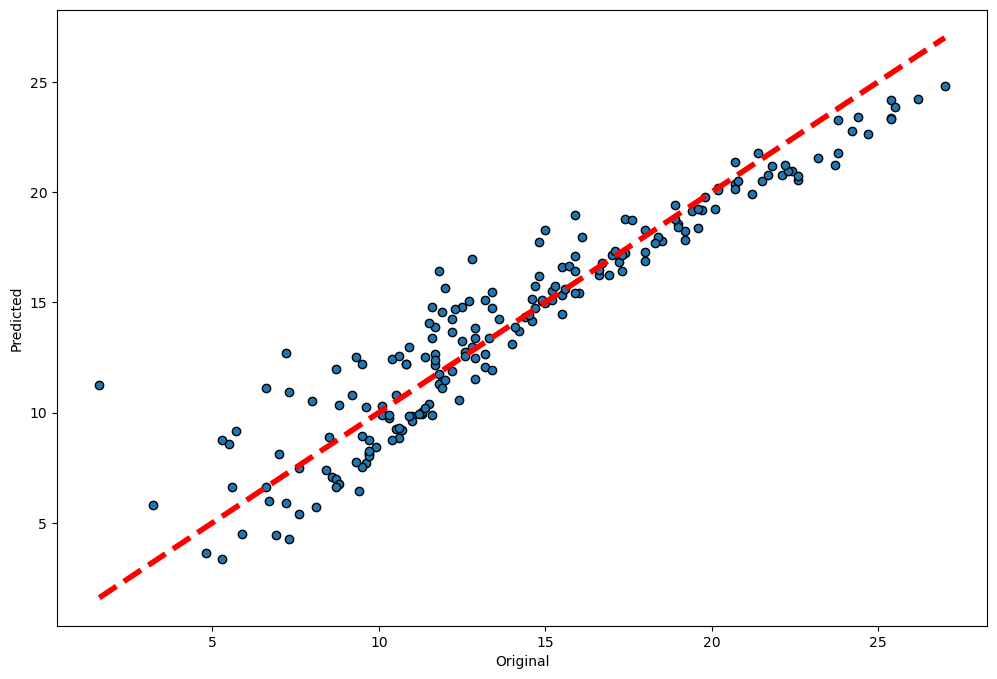

In [67]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

#Displays the coefficients
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)


lr = LinearRegression()

ridge = Ridge(alpha=6) ## reduces overfitting
predicted_r = cross_val_predict(ridge, X, y, cv=5) #predicts the sales of a product through the model by cross validation
print(mean_squared_error(y, predicted_r)) ##le 3.07 sur la réponse

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

### Logistic Regression

The logistic regression example here is rehashed from the applied machine learning laboratory.

In [68]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
df = pd.read_csv("../Exercises/07 - Learning from data - Applied Machine Learning/data/aac_intakes_outcomes.csv", usecols=columns)
df.head(5)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


The goal here is to predict if a cat in a shelter will get adopted or die a miserable existence.

The code below is also more generalisable to running ML models as a whole.

The dataframe above contains many different categorical variables that must be converted to suitable numerical values through dummy encoding.

In [69]:
df['adopted'] = df['outcome_type'].apply(lambda r: 1 if r=='Adoption' else 0)
df.drop('outcome_type', axis=1, inplace=True) ## adoption is turned into a 1 or 0 to create a suitable binary target

## We can now perform the triage into the training and testing data sets. The function below can be reused for other applications
## It is generally recommended to do this before trying to binarise the categorical data(c.f. gpt)
def split_set(data_to_split, ratio=0.8): ## use the built in function from now on
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]
## np.random.rand is used to generate an array the size of the dataframe of random numbers between 0 and 1
## if it is below the ratio, then its true, else it's false
## .random is the module, .rand is the fucntion that defines the random number between 0 and 1
## Then defined into an array
[train, test] = split_set(df, ratio = 0.8)

categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition',
                       'intake_type', 'sex_upon_intake'] ## Categorical columns are then created on the training dataset
## .getdummies is applied to each categorical column of the dataframe. 
train_categorical = pd.get_dummies(train, columns=categorical_columns)
test_categorical = pd.get_dummies(test, columns=categorical_columns)[train_categorical.columns]## The ones in the test dataset are made to match it
## The function runs through each and every possible outcome to it and seperates these into new binary columns

if train_categorical.columns.equals(test_categorical.columns):
    print("True") ## verification

## The adopted column must now be dropped from the train and test categorical but be inserted into the label
train_label = train_categorical['adopted']
test_label = test_categorical['adopted']
train_features = train_categorical.drop("adopted", axis=1)
test_features = test_categorical.drop("adopted", axis=1)
 
## We may now standardise everything as described in the prompt, even for categorical values
means = train_features.mean()
stddevs = train_features.std()

train_features_std = pd.DataFrame()
for c in train_features.columns:
    train_features_std[c] = (train_features[c]-means[c])/stddevs[c] 

test_features_std = pd.DataFrame()
for c in test_features.columns:
    test_features_std[c] = (test_features[c]-means[c])/stddevs[c] ## means and std of the training set are used

train_features_std.head()

True


,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,1.670329,1.686163,-1.101101,1.905213,-0.366602,-0.363993,-0.372926,1.343086,-0.686431,-0.302798,...,-0.058875,-0.483880,3.857727,-1.531600,-0.211299,-0.650016,-0.685094,2.297188,-0.403883,-0.302798
1,1.326003,1.341051,-1.101101,4.088123,-0.370023,-0.363993,-0.372926,1.343086,-0.686431,-0.302798,...,-0.058875,-0.483880,3.857727,-1.531600,-0.211299,-0.650016,-0.685094,2.297188,-0.403883,-0.302798
2,2.703309,2.721501,-1.101101,-0.277697,-0.279557,-0.363993,-0.372926,1.343086,-0.686431,-0.302798,...,-0.058875,2.066594,-0.259216,-1.531600,-0.211299,-0.650016,-0.685094,2.297188,-0.403883,-0.302798
3,4.769269,4.792177,-1.867682,-0.277697,-0.393353,-0.363993,-0.372926,1.343086,-0.686431,-0.302798,...,-0.058875,-0.483880,3.857727,-1.531600,-0.211299,-0.650016,-0.685094,2.297188,-0.403883,-0.302798
4,4.424942,4.447065,-1.867682,-0.277697,-0.375725,-0.363993,-0.372926,-0.744542,1.456789,-0.302798,...,-0.058875,-0.483880,-0.259216,0.652902,-0.211299,-0.650016,-0.685094,-0.435308,2.475928,-0.302798


The code snippet above creates both training and testing dataframes, each with their own features and labels. The model can now be initialised and run

In [70]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(train_features_std, train_label)
prediction_proba = logistic.predict_proba(test_features_std)

Being a binary classifier, its performance may be assessed using a confusion matrix. Helper functions that compute the accuracy, recall, f1 and all that stuff are listed below and can be reused during the exam. 

In [71]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int) ## probabilities are converted into binary predictions   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1)) ## adds one if both conditions are met
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]]) ## defines the matrix 
    return confusion_matrix
## prediction proba is the list of probabilities given by the logistic regression
## true label is the list of actual class labels for the dataset

def plot_confusion_matrix(confusion_matrix):## very visual way to represent the confusion matrix 
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]]) ## adds labels to each of the entries in the confusin matrix 
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) ## converts confusion matrix into a pd df
    
    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) 
    precision_negative = TN/(TN+FN) 
    
    recall_positive = TP/(TP+FN) 
    recall_negative = TN/(TN+FP) 

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

<function matplotlib.pyplot.show(close=None, block=None)>

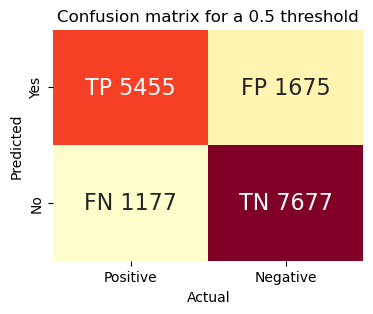

In [72]:
confusion_matrix05 = compute_confusion_matrix(test_label, prediction_proba, decision_threshold=0.5)

plt.figure(figsize = (4,3)) 
ax = plot_confusion_matrix(confusion_matrix05)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix for a 0.5 threshold')
plt.show

In [73]:
[t, accuracy, precision_positive, recall_positive, F1_score_positive, \
    precision_negative, recall_negative, F1_score_negative] = compute_all_score(confusion_matrix05)

print(t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative)

0.5 0.8215715715715716 0.7650771388499299 0.8225271411338962 0.792762679843046 0.8670657330020329 0.8208939264328486 0.8433483466988906


It is possible to perform this test for new thresholds in order to determine the optimal one. The results can be graphically represented as done in the solutions or given textually as I had done. The code can be found in the appropriate notebooks.

### Random Forests

The radom forest classifier example below is rehashed form the supervised learning notebook.

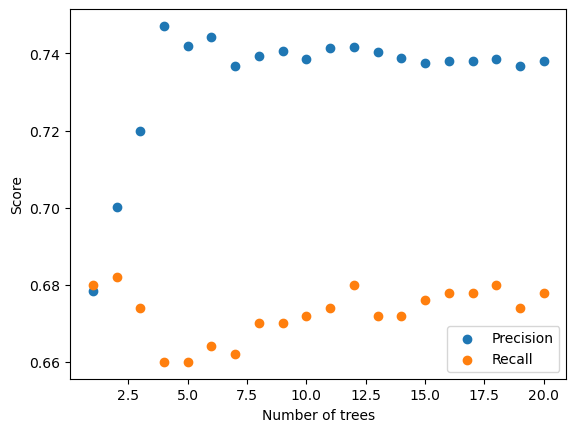

In [74]:
titanic = pd.read_excel('../Exercises/06 - Learning from data - Supervised learning/data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived'] ## The data is split into features and targets

precision_scores = []
recall_scores = []
number_trees = [n for n in range(1, 21)]

for nt in number_trees:
    RFC = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt) ## model is intialised
    RFC.fit(X, y) ## and is fit
    precision = cross_val_score(RFC, X, y, cv=10, scoring="precision") ## precision is computed
    precision_scores.append(precision.mean())
    recall = cross_val_score(RFC, X, y, cv=10, scoring="recall") ## recall is computed
    recall_scores.append(recall.mean())
#print(precision_scores)
#print(recall_scores)

fig, ax = plt.subplots()
ax.scatter(number_trees, precision_scores, label="Precision")
ax.scatter(number_trees, recall_scores, label = "Recall")
ax.set_xlabel("Number of trees")
ax.set_ylabel("Score")
ax.legend()
plt.show()

### k-NN

K Nearest Neighbours was only quiclkly described in the supervised learning notebook once again. The following will be rehashed from it.

Text(0.5, 1.0, 'Circles')

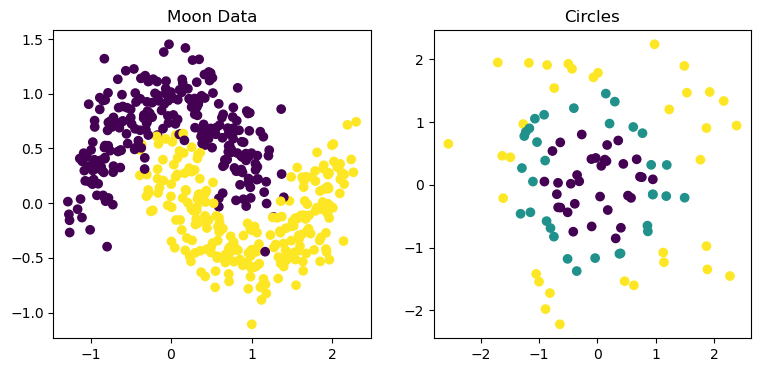

In [75]:
X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

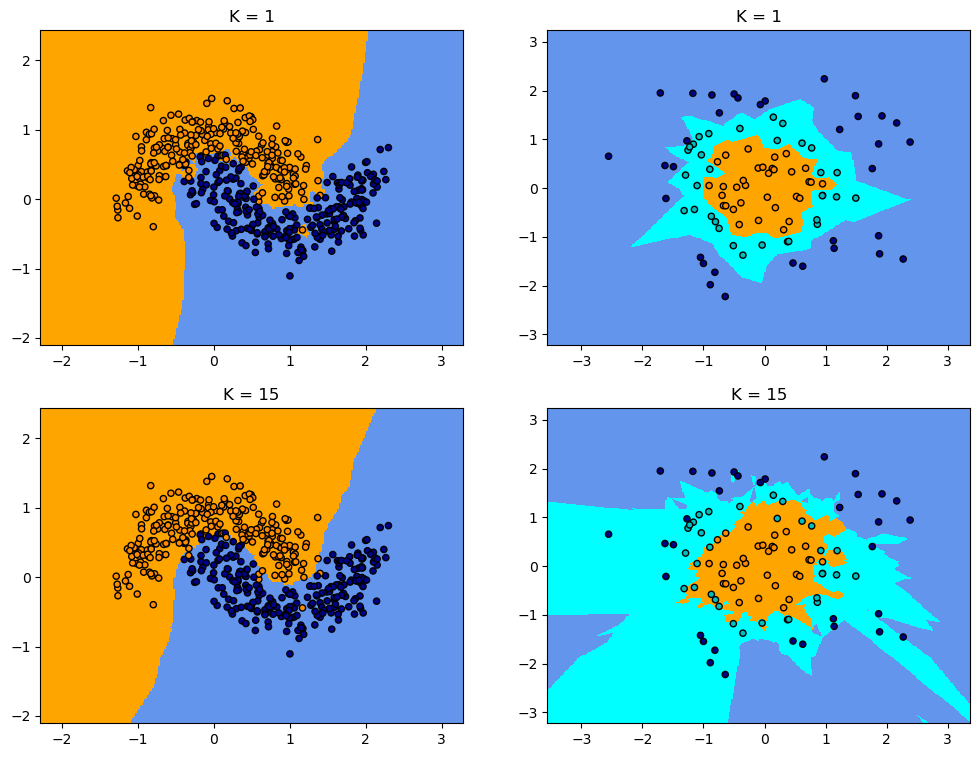

In [76]:
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K): ## plotting helper that can be reused if necessary
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

    # K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles) ## models are fit for the k nearest neighrbout in question before plotting
# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

### Decision Trees

Decision trees are the last from of supervised learning that will be analysed in this notebook. The following is rehashed from the decision tree exercise given in homework 2 (which also serves as a good list of examples of machine learning applications).

In [77]:
## Initial data preprocessing taken as is from the homework.
## Follows the same pattern shown in the logistic regression

data_df = pd.read_csv('../Homework/02_PROJECT_CAR_SALES/data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
sold_within_three_months = data_df[data_df['sold_within_3_months'] == 1]
three_months = data_df.copy()
three_months_categorical = pd.get_dummies(three_months, drop_first=True) ## drop_first set to true in order to avoid colinearity
three_months_categorical.head(10)
three_months_features_df = three_months_categorical.drop('sold_within_3_months', axis=1)
three_months_features_df.head()
three_months_targets_df = three_months_categorical['sold_within_3_months']

m3_train_features_df, m3_test_features_df, m3_train_targets_df, m3_test_targets_df =\
    train_test_split(three_months_features_df, three_months_targets_df, test_size=0.2, random_state=42)

m3_train_features_df = m3_train_features_df.reset_index(drop=True)
m3_train_targets_df = m3_train_targets_df.reset_index(drop=True)
m3_test_features_df = m3_test_features_df.reset_index(drop=True)
m3_test_targets_df = m3_test_targets_df.reset_index(drop=True)

print(f"The training dataframe has a size of {m3_train_features_df.shape[0]}.")
print(f"The testing dataframe has a size of {m3_test_features_df.shape[0]}.")

m3_rapport = m3_test_features_df.shape[0] / (m3_train_features_df.shape[0] + m3_test_features_df.shape[0])
print(f"The ratio of train over total data size is {round(m3_rapport,3)}, hence validating the split as described in the prompt.")

The training dataframe has a size of 1148.
The testing dataframe has a size of 288.
The ratio of train over total data size is 0.201, hence validating the split as described in the prompt.


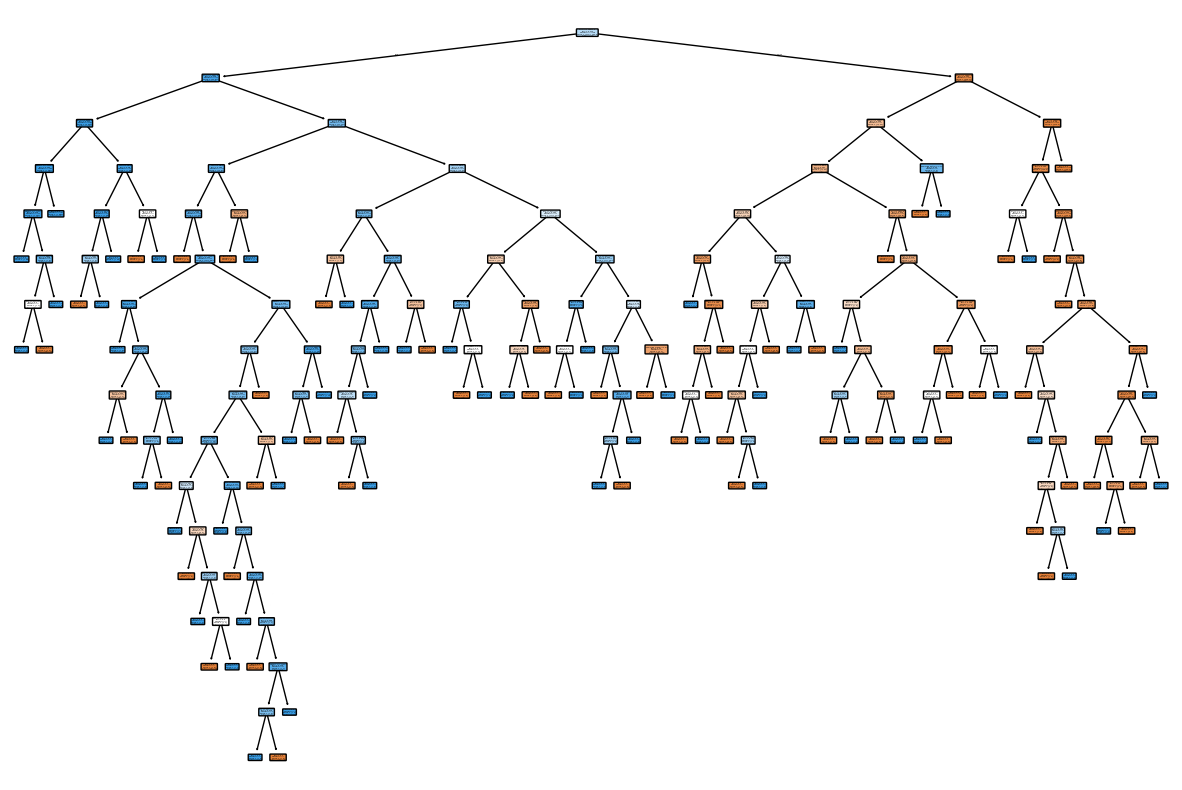

In [78]:
DT1 = DecisionTreeClassifier(random_state=42)
DT1.fit(m3_train_features_df, m3_train_targets_df) ## no standardised variables should be used n decision trees

m3_test_predicted_DT1_df = DT1.predict(m3_test_features_df)
DT1_accuracy = accuracy_score(m3_test_targets_df, m3_test_predicted_DT1_df) ## is the accuracy what they mean by evaluate? or just fit it?
DT1_precision = precision_score(m3_test_targets_df, m3_test_predicted_DT1_df)  
DT1_recall = recall_score(m3_test_targets_df, m3_test_predicted_DT1_df)
DT1_f1 = f1_score(m3_test_targets_df, m3_test_predicted_DT1_df)
DT1_depth = DT1.get_depth()

plt.figure(figsize=(15, 10))  
plot_tree(DT1, feature_names = m3_train_features_df.columns.tolist(), class_names=['Not Sold', 'Sold'], filled=True, rounded=True)
plt.show()

An iterative code can also be run to tune the hyperparameter as to get the best possible performance out of the model.

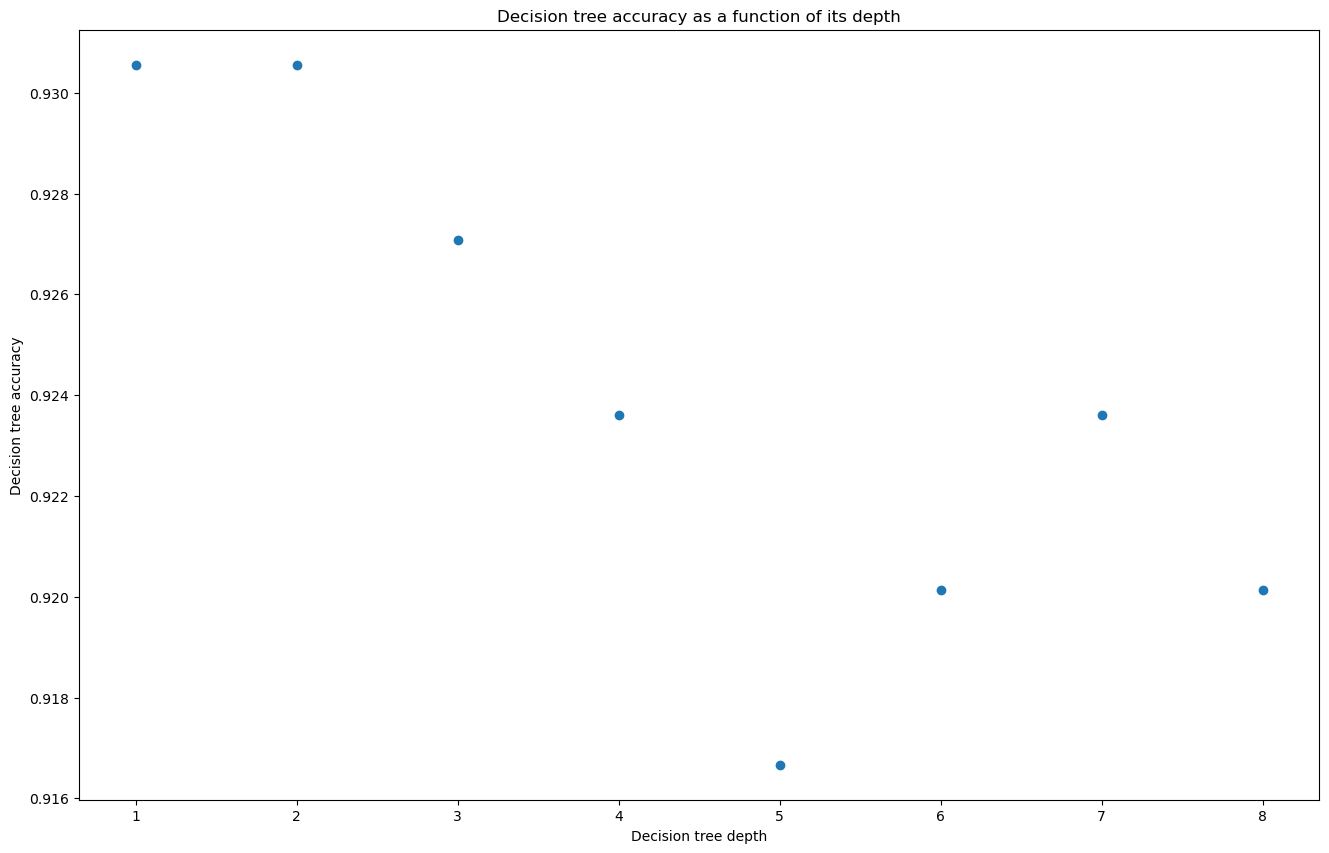

In [79]:
D = 8 ## retaken from the homework

dt_depth_results = {}

for i in range(1, D+1):
    DTi = DecisionTreeClassifier(max_depth=i, random_state = 42)
    DTi.fit(m3_train_features_df, m3_train_targets_df) 
    m3_test_predicted_DTi_df = DTi.predict(m3_test_features_df)

    DTi_depth = DTi.get_depth()
    DTi_accuracy = accuracy_score(m3_test_targets_df, m3_test_predicted_DTi_df) 

    dt_depth_results[DTi_depth] = DTi_accuracy

DT = pd.DataFrame({'Depth' : dt_depth_results.keys(), 'Accuracy': dt_depth_results.values()})

plt.figure(figsize= (16, 10))
plt.scatter(DT['Depth'], DT['Accuracy'])
plt.xlabel('Decision tree depth')
plt.ylabel('Decision tree accuracy')
plt.title('Decision tree accuracy as a function of its depth')
plt.show()

### K-means

K-means is the first unsupervised learning model that will be discussed in this section. The following is retaken from the unsupervised learning notebook performed in laboratory session 8.

In [80]:
df = pd.read_csv('../Exercises/08 - Learning from data - Unsupervised learning/seeds_dataset.csv')
df.head(5)

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [81]:
## Helper function to plot the standard scaled errors

def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")

c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmea

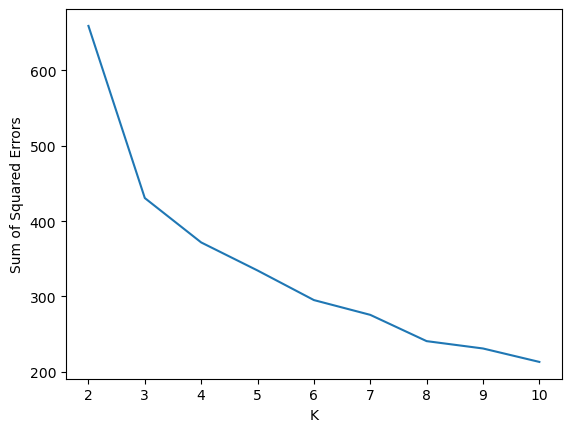

In [82]:
seeds_features = df.drop("ID", axis=1).drop("seedType", axis=1)

scaled_features = StandardScaler().fit(seeds_features).transform(seeds_features) 
## automatic standardisation of the features, of utmost importance
plot_sse(scaled_features);

c:\Users\Karl Abdelnour\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Discovered clusters')

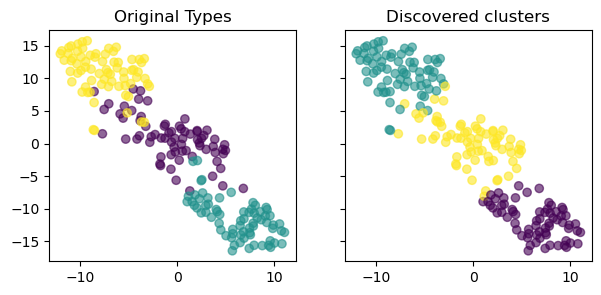

In [83]:
# Apply t-SNE for dimensionality reduction
X_reduced_tsne = TSNE(
    n_components=2,  # Reduce to 2 dimensions for visualization
    init='random',   # Initialize the embedding randomly
    learning_rate='auto',  # Adjust the learning rate automatically
    random_state=0  # Set random state for reproducibility
).fit_transform(scaled_features)  # Apply t-SNE on the scaled features

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# First subplot: Plot the t-SNE results with original labels
axs[0].scatter(
    X_reduced_tsne[:, 0],  # First t-SNE dimension
    X_reduced_tsne[:, 1],  # Second t-SNE dimension
    c=df.seedType,  # Color points based on the original seed types
    alpha=0.6  # Set transparency for better visualization
)
axs[0].set_title("Original Types")  # Add a title to the first subplot

# Perform k-means clustering on the scaled features
labels = KMeans(
    n_clusters=3,  # Specify the number of clusters (3)
    random_state=0  # Set random state for reproducibility
).fit_predict(scaled_features)  # Fit k-means and assign cluster labels

# Second subplot: Plot the t-SNE results with k-means cluster labels
axs[1].scatter(
    X_reduced_tsne[:, 0],  # First t-SNE dimension
    X_reduced_tsne[:, 1],  # Second t-SNE dimension
    c=labels,  # Color points based on k-means cluster labels
    alpha=0.6  # Set transparency for better visualization
)
axs[1].set_title("Discovered clusters")  # Add a title to the second subplot


t-SNE (t-distributed Stochastic Neighbor Embedding) and Principal Component Analysis (PCA) are dimensionality reduction techniques. These are applied before applying k-means. 

PCA is useful for preprocessing high-dimensional data before applying k-means. It preserves much of the initial information thus making the k-means even more accurate. It does nto always have to be applied and is only really necessary if the initial data is of very high dimensionality. An example of its application is given in the unsupervised learning notebook and in the following major section on text handling.

t-SNE is best for visualizing clusters after applying k-means. It is not however suitable for preprocessing. 
In the code above, the graph on the left only demonstrates the original data with t-SNE applied while the second shows the resulting application of a k-means ML model.



### DBSCAN

DBSCAN is the final unsupervised learning method that will be described in this section. It is an alternative to k-Means in cases where the data takes on a much more complex shape.

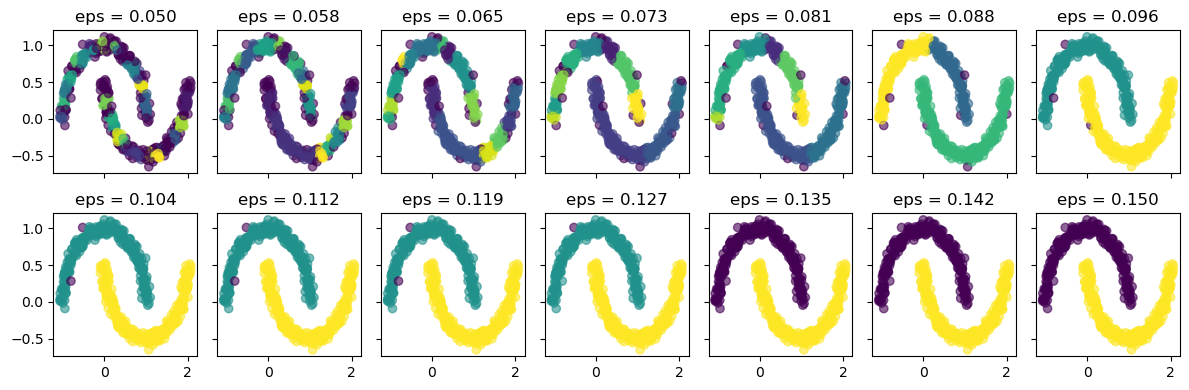

In [84]:
X_moons, _ = make_moons(500, noise=0.05, random_state=0) ## the data is artificalmy generated

# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14) ## alternative to iterating 

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS) ## for the subsequent representation of the data

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS ## takes the ith position of the plot panel depending on the eps parameter
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons) ## actually run the model
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6) ## plot it
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

The eps parameter (short for epsilon) in DBSCAN (Density-Based Spatial Clustering of Applications with Noise) defines the maximum distance between two points for them to be considered neighbors.

## Text Data

The example below used for text data is completly rehashed from the first laboratory session as the secondis more generalisable to the entire course and will thus be performed in its entirety at some point.

Natural language processing (NLP) libraires are imported.